O código deste notebook é baseado em: https://www.datacamp.com/projects/38

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

In [ ]:
r = requests.get("https://www.gutenberg.org/cache/epub/55752/pg55752-images.html")

r.encoding = 'utf-8'

html = r.text

print(html[0:2000])

<!DOCTYPE html>
<html lang="pt">
<head>
<meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight:bold;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-top:

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

text = soup.get_text()

print(text[1200: 3000])

NameError: name 'BeautifulSoup' is not defined

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[0:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Dom', 'Casmurro', 'by']


In [ ]:
words = []

for word in tokens:
  words.append(word.lower())

print(words[0:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'dom', 'casmurro', 'by']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
words_ns =  [word for word in words if word not in sw]

In [ ]:
print(words_ns[0:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'dom', 'casmurro', 'by']


In [ ]:
freqdist = nltk.FreqDist(words_ns)

In [ ]:
freqdist

FreqDist({'capitú': 342, 'á': 262, 'elle': 240, 'mãe': 229, 'dias': 191, 'the': 190, 'tambem': 189, 'tudo': 188, 'ella': 187, 'disse': 182, ...})

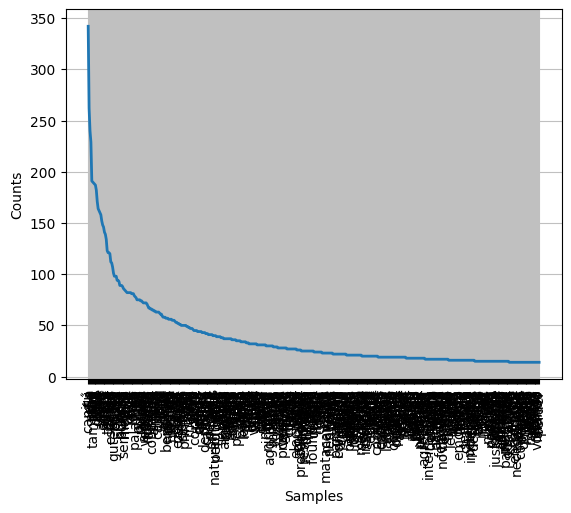

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
%matplotlib inline

freqdist.plot(500)

In [ ]:
# Utilizando nltk para processar bi-gramas
from nltk import bigrams
string_bigrams = list(bigrams(words_ns))
print(string_bigrams)

[('the', 'project'), ('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'of'), ('of', 'dom'), ('dom', 'casmurro'), ('casmurro', 'by'), ('by', 'machado'), ('machado', 'assis'), ('assis', 'the'), ('the', 'project'), ('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'of'), ('of', 'dom'), ('dom', 'casmurro'), ('casmurro', 'this'), ('this', 'ebook'), ('ebook', 'is'), ('is', 'the'), ('the', 'use'), ('use', 'of'), ('of', 'anyone'), ('anyone', 'anywhere'), ('anywhere', 'in'), ('in', 'the'), ('the', 'united'), ('united', 'states'), ('states', 'and'), ('and', 'most'), ('most', 'other'), ('other', 'parts'), ('parts', 'of'), ('of', 'the'), ('the', 'world'), ('world', 'at'), ('at', 'cost'), ('cost', 'and'), ('and', 'with'), ('with', 'almost'), ('almost', 'restrictions'), ('restrictions', 'whatsoever'), ('whatsoever', 'you'), ('you', 'may'), ('may', 'copy'), ('copy', 'it'), ('it', 'give'), ('give', 'it'), ('it', 'away'), ('away', 'or'), ('or', 're'), ('re', 'use'), ('use', 'it'), 

In [ ]:
freqdist = nltk.FreqDist(string_bigrams)

In [ ]:
freqdist

FreqDist({('josé', 'dias'): 151, ('project', 'gutenberg'): 89, ('prima', 'justina'): 52, ('tio', 'cosme'): 50, ('the', 'project'): 34, ('of', 'the'): 34, ('outra', 'vez'): 32, ('á', 'porta'): 29, ('outra', 'cousa'): 26, ('alguma', 'cousa'): 23, ...})

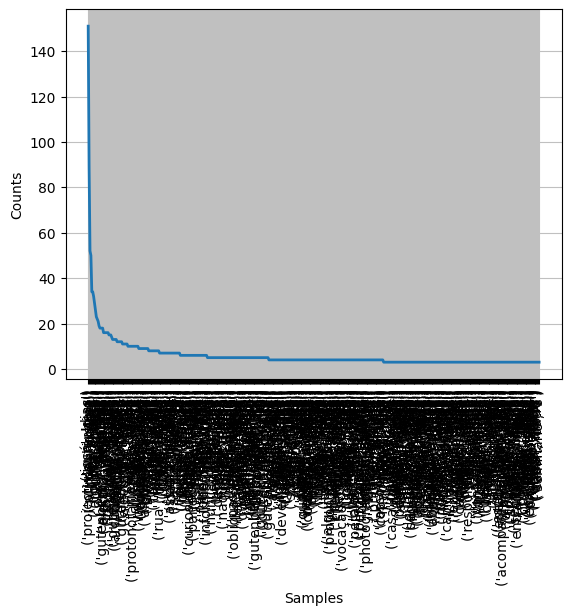

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
%matplotlib inline

freqdist.plot(500)